In [65]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Model, Sequential
from keras.layers import Input, Embedding, Conv1D, GRU, LSTM, Dense
from keras.layers import TimeDistributed, GlobalMaxPool1D, Concatenate, Add, Lambda

In [66]:
# Downloading the data
!gdown 13eD1w2XOwwMkNFMy9QYk-CourDtx4FZN

'gdown' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [67]:
# Reading the data
path = "nietzsche.txt"

with open(path, encoding="utf-8") as f:
    # convert to lowercase
    text = f.read().lower()
text = text.replace("\n", " ")  # We remove newlines chars for nicer display
print("Corpus length:", len(text))

Corpus length: 600893


In [68]:
# Split corpus on whitespace to get words

# Your code here
words = text.split()
# Vocabulary (all unique words)
# Your code here
vocab = sorted(set(words))
# Length of longest word in vocabulary
# Your code here
maxlen = max([len(w) for w in vocab])
# Word <> Integer Mapping
# Your code here
word2int = {w: i + 1 for i, w in enumerate(vocab)}
idx2word = {i + 1: w for i, w in enumerate(vocab)}

In [69]:
print("Vocabulary size:", len(vocab))
print("Max length:", maxlen)

Vocabulary size: 17682
Max length: 28


In [70]:
# Sorted list of all unique chars
# Your code here
chars = sorted(set(text))

In [71]:
# char to integer mappings
# Your code here
char2int = {c : i + 1 for i, c in enumerate(chars)}
idx2char = {i + 1 : c for i, c in enumerate(chars)}

In [72]:
print(char2int)
for i, c in enumerate(chars):
    print(c, char2int[c])

{' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '=': 22, '?': 23, '[': 24, ']': 25, '_': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30, 'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40, 'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50, 'y': 51, 'z': 52, 'ä': 53, 'æ': 54, 'é': 55, 'ë': 56}
  1
! 2
" 3
' 4
( 5
) 6
, 7
- 8
. 9
0 10
1 11
2 12
3 13
4 14
5 15
6 16
7 17
8 18
9 19
: 20
; 21
= 22
? 23
[ 24
] 25
_ 26
a 27
b 28
c 29
d 30
e 31
f 32
g 33
h 34
i 35
j 36
k 37
l 38
m 39
n 40
o 41
p 42
q 43
r 44
s 45
t 46
u 47
v 48
w 49
x 50
y 51
z 52
ä 53
æ 54
é 55
ë 56


In [73]:
# Create your dataset X and Y
# Number of words in a sequnce (sliding window size)
SEQ_LEN = 20
WORD_LEN = maxlen
# Cut the text into sequences of SEQ_LEN words
sequences = []
for i in range(0, len(words) - SEQ_LEN):
    sequences.append(words[i : i + SEQ_LEN])

# Encode words as character sequences
def word2charseq(word, word_len, char2idx):
    # Your code here
    seq = [char2idx[c] for c in word]
    # Pad with zeros to get fixed length sequences
    # Your code here
    seq = seq + [0] * (word_len - len(seq))
    return seq

# Prepare numpy arrays to store input and target sequences
# Note the difference in dimensions!
X = np.zeros((len(sequences), SEQ_LEN, WORD_LEN), dtype=np.int32)
Y = np.zeros((len(sequences), SEQ_LEN), dtype=np.int32)

# Populate X and Y
# X is sequences of sequences of int encoded characters
# Y is squences of int encoded words offset from X by 1 word
# Your code here
for i, seq in enumerate(sequences):
    for j, word in enumerate(seq):
        X[i, j] = word2charseq(word, WORD_LEN, char2int)
    if i < len(sequences) - 1:
        Y[i] = word2charseq(sequences[i + 1], SEQ_LEN, word2int)
    else: # 仔细看上边sequence的赋值的时候，最后一组words[i:i+SEQ_LEN]当i = len(words) - SEQ_LEN时 并没有放到sequence里边，被留下来当作Y的最后一组
        Y[i] = word2charseq(words[len(words)-SEQ_LEN:], SEQ_LEN, word2int)


In [74]:
sequences[209]

['on',
 'the',
 'part',
 'of',
 'grammar,',
 'or',
 'an',
 'audacious',
 'generalization',
 'of',
 'very',
 'restricted,',
 'very',
 'personal,',
 'very',
 'human--all-too-human',
 'facts.',
 'the',
 'philosophy',
 'of']

In [75]:
# Input Sequence (Numerical)
X[209]

array([[41, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [46, 34, 31,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [42, 27, 44, 46,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [41, 32,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [33, 44, 27, 39, 39, 27, 44,  7,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [41, 44,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [27, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [27, 47, 30, 27, 29, 35, 41, 47, 45,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  

In [76]:
# Target Sequence (Numerical)
Y[209]

array([15808, 11644, 11201,  7487, 11348,  1986,  2517,  7262, 11201,
       16932, 13475, 16932, 11860, 16932,  8190,  6492, 15808, 11965,
       11201, 15808])

In [77]:
# Target Sequence (Text)
[idx2word[i] for i in Y[209]]

['the',
 'part',
 'of',
 'grammar,',
 'or',
 'an',
 'audacious',
 'generalization',
 'of',
 'very',
 'restricted,',
 'very',
 'personal,',
 'very',
 'human--all-too-human',
 'facts.',
 'the',
 'philosophy',
 'of',
 'the']

In [78]:
# Create a tensorflow dataset from the input data

# Your code here
Dataset = tf.data.Dataset.from_tensor_slices((X, Y))
# Shuffle and batch the data
# Your code here
Dataset = Dataset.shuffle(buffer_size=10000)
# Batch the dataset
batch_size = 128
Dataset = Dataset.batch(batch_size=batch_size)
#Prefetch the data
Dataset = Dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [79]:
# Define a class that builds the custom layer for the highway network
# This will implement the equation presented above

class HighwayLayer(tf.keras.layers.Layer):
    def __init__(self):
        # In init function, we define the parameters of the layer
        super(HighwayLayer, self).__init__()
        self.supports_masking = True

    def build(self, input_shape):  # Create the state of the layer (weights)
        # In build function we define the trainable weights of the layer
        dim = input_shape[-1]
        # T gate initializer
        self.T = self.add_weight(shape=(1, dim), initializer='glorot_uniform', trainable=True)
        super(HighwayLayer, self).build(input_shape)
        

    def call(self, z, r): # z, r the same as in the lecture slides on page 75
        # In call function we define the forward pass, or how to calculate the output of the layer from the input
        return z * self.T + (1 - self.T) * r

In [83]:
EMB_DIM = 64
N_FILTERS = 32
HIDDEN_DIM = 64
 # Define simplified ELMO network


# Your code here
def Simplified_ELMO():
    # X = np.zeros((len(sequences), SEQ_LEN, WORD_LEN), dtype=np.int32) 后两项是input_shape
    input = Input(shape=(SEQ_LEN, WORD_LEN), dtype='int32')
    # input_dim 是词汇表的大小，output_dim 是转化后的embedding的维度，input_length 是输入序列的长度
    # input_dim = len(chars) + 1 是因为我们要把0作为padding的字符，所以词汇表的大小要加1
    emb = TimeDistributed(Embedding(input_dim=len(chars) + 1, output_dim=EMB_DIM, input_length=WORD_LEN, name="emb"))(input)
    # 这里embedding layer之后，input的shape变成了(SEQ_LEN, WORD_LEN, EMB_DIM)
    # Use Conv1D layers for character CNNs. 
    # filters indicates the number of kernels of shape(kernel_size, EMB_DIM) used for the convolution. 
    conv1 = TimeDistributed(Conv1D(filters=N_FILTERS, kernel_size=(3), padding='same'))(emb)
    conv2 = TimeDistributed(Conv1D(filters=N_FILTERS, kernel_size=(4), padding='same'))(emb)
    conv3 = TimeDistributed(Conv1D(filters=N_FILTERS, kernel_size=(5), padding='same'))(emb)
    # 这里相当于是用两种不同宽度的kernel来做卷积，然后我们后边池化完会把结果拼接起来
    # Conv1D layer will output a tensor of shape (SEQ_LEN, WORD_LEN - kernel_size + 1, N_FILTERS)
    # Use GlobalMaxPool1D() after the convolution layers.
    # r 
    pool1 = TimeDistributed(GlobalMaxPool1D())(conv1)
    pool2 = TimeDistributed(GlobalMaxPool1D())(conv2)
    pool3 = TimeDistributed(GlobalMaxPool1D())(conv3)
    r = Concatenate()([pool1, pool2, pool3])
    # Maxpooling layer will output a tensor of shape (SEQ_LEN, N_FILTERS)
    # 这个shape变成这样是因为在GlobalMaxPool1D层，会把每个filter得到的卷积结果中[就是size(WORD_LEN-kernel_size+1)这一维度]的最大值取出来，所以每个filter就只剩一个值了，所以最后的shape就是(SEQ_LEN, N_FILTERS)
    # 把两个pooling的结果拼接起来，然后用Dense() layer来做非线性变换，得到z， pool 的shape是(SEQ_LEN, 2*N_FILTERS)
    # z = DNN(pool)  you can find r ,z in the lecture slides On Page 75.
    z = Dense(r.shape[-1], activation='relu', name='z')(r)
    
    # Use HighwayLayer() after pooling.
    x = HighwayLayer()(z, r)
    #Use LSTM() and Dense() layers to output the predictions.
    h = LSTM(HIDDEN_DIM, return_sequences=True, name='LSTM')(x)
    # LSTM的输出shape(SEQ_LEN, HIDDEN_DIM)
    output = Dense(len(vocab) + 1, activation='softmax', name='output')(h)
    # len(vocab) + 1 是因为我上边算word2int的时候，整体加了1，所以这里要加1， 如果你没加1，这里就不用加1， 但是出于习惯一般0作为padding的字符要独立出来，所以一般都会加1
    model = Model(inputs=input, outputs=output, name = 'Simplified_ELMO')
    optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    return model
model = Simplified_ELMO()
history = model.fit(X, Y, epochs=10, batch_size=128, validation_split=0.2)

Model: "Simplified_ELMO"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 20, 28)]     0           []                               
                                                                                                  
 time_distributed_34 (TimeDistr  (None, 20, 28, 64)  3648        ['input_9[0][0]']                
 ibuted)                                                                                          
                                                                                                  
 time_distributed_35 (TimeDistr  (None, 20, 28, 32)  6176        ['time_distributed_34[0][0]']    
 ibuted)                                                                                          
                                                                                    

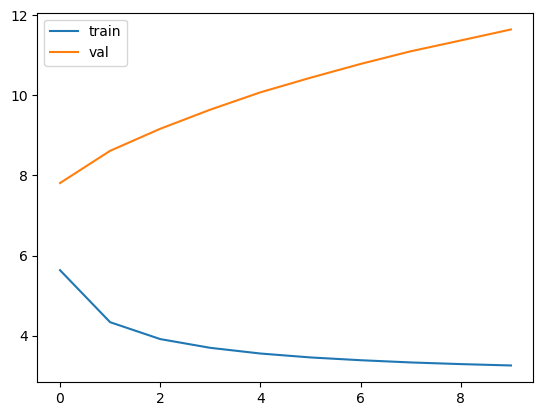

In [84]:
# Plot loss lots
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend()
plt.show()

In [85]:
EMB_DIM = 64
N_FILTERS = 64
def bidir_model():
    inputs = Input(shape=(SEQ_LEN, WORD_LEN), dtype='int32')
    emb = TimeDistributed(Embedding(input_dim=len(chars) + 1, output_dim=EMB_DIM, input_length=WORD_LEN, name="emb"))(inputs)
    conv1 = TimeDistributed(Conv1D(N_FILTERS, kernel_size=(3), padding = 'same'))(emb)
    conv2 = TimeDistributed(Conv1D(N_FILTERS, kernel_size=(4), padding = 'same'))(emb)
    conv3 = TimeDistributed(Conv1D(N_FILTERS, kernel_size=(5), padding = 'same'))(emb)

    pool1 = TimeDistributed(GlobalMaxPool1D())(conv1)
    pool2 = TimeDistributed(GlobalMaxPool1D())(conv2)
    pool3 = TimeDistributed(GlobalMaxPool1D())(conv3)

    r = Concatenate()([pool1, pool2, pool3])
    z = Dense(r.shape[-1], name='z')(r)

    x = HighwayLayer()(z, r)
    x_reversed = Lambda(lambda x: x[:, ::-1, :])(x)

    lstm_units = x.shape[-1] // 2
    lstm_f1 = LSTM(lstm_units, return_sequences=True)(x)
    # 1.why bias = false and 2.input x center/mean around 0 
    linear_f = Dense(lstm_units, use_bias=False)(x)
    # xt * W == xt dot z
    # 1.skip what connection 2. why learn difference
    skip_f = Add()([lstm_f1, linear_f])
    lstm_f2 = LSTM(lstm_units, return_sequences=True)(skip_f)
    # lstm_f3 (lstm_f2, Dense(lstm_f1), Dense(x))
    
    lstm_b1 = LSTM(lstm_units, return_sequences=True)(x_reversed)
    linear_b = Dense(lstm_units, use_bias=False)(x_reversed)
    skip_b = Add()([lstm_b1, linear_b])
    lstm_b2 = LSTM(lstm_units, return_sequences=True)(skip_b)
    lstm_b2_reversed = Lambda(lambda x: x[:, ::-1, :])(lstm_b2)

    outputs = Dense(len(vocab) + 1, activation='softmax')(Concatenate()([lstm_f2, lstm_b2_reversed]))
    model = Model(inputs=inputs, outputs=outputs, name='ELMO')
    optimizer = keras.optimizers.RMSprop(learning_rate=0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()



In [89]:
EPOCHS = 5
model.fit(X, Y, epochs=EPOCHS, batch_size=128, validation_split=0.2)


Epoch 1/5
620/620 [==============================] - 18s 28ms/step - loss: 3.2270 - accuracy: 0.3392 - val_loss: 11.9314 - val_accuracy: 0.1010
Epoch 2/5
620/620 [==============================] - 17s 28ms/step - loss: 3.2010 - accuracy: 0.3437 - val_loss: 12.2048 - val_accuracy: 0.0974
Epoch 3/5
620/620 [==============================] - 17s 28ms/step - loss: 3.1817 - accuracy: 0.3469 - val_loss: 12.2974 - val_accuracy: 0.0953
Epoch 4/5
620/620 [==============================] - 17s 28ms/step - loss: 3.1649 - accuracy: 0.3495 - val_loss: 12.5395 - val_accuracy: 0.0969
Epoch 5/5
620/620 [==============================] - 17s 28ms/step - loss: 3.1490 - accuracy: 0.3520 - val_loss: 12.8802 - val_accuracy: 0.1014


([<matplotlib.axis.XTick at 0x1f710ade910>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

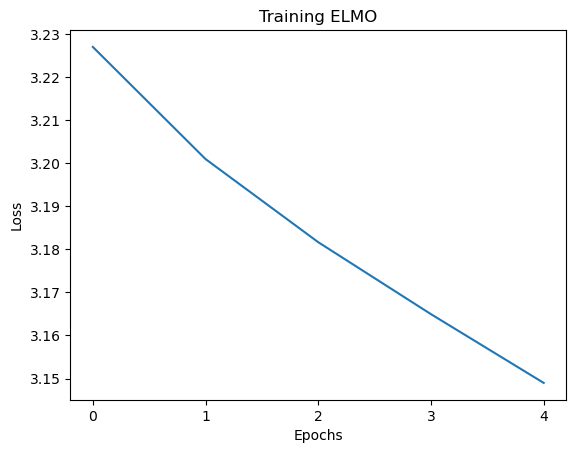

In [90]:
plt.plot(model.history.history['loss'], label='train')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training ELMO')
plt.xticks(range(EPOCHS))
